In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist # type: ignore

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  
X_train, X_test = X_train / 255.0, X_test / 255.0 


In [29]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))


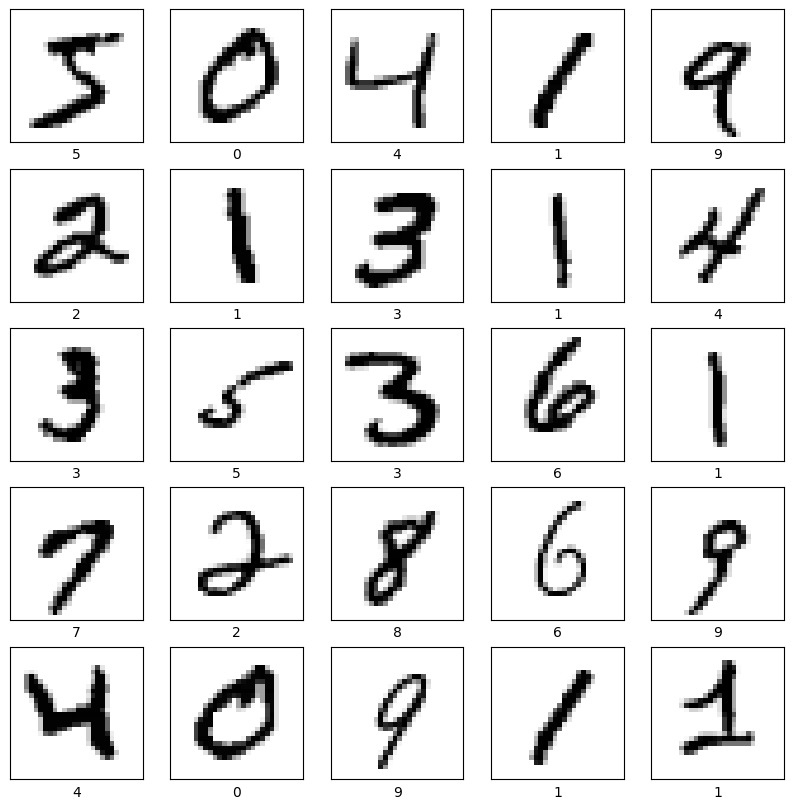

In [30]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [31]:
class NeuralNetwork:

  def __init__(self, input_size, hidden_size, output_size):
    
    self.input_size = input_size
    
    self.hidden_size = hidden_size
    
    self.output_size = output_size

    self.weight_input_to_hidden = np.random.randn(self.input_size, self.hidden_size)
    
    self.bias_hidden = np.zeros((1, self.hidden_size))
    
    self.weight_hidden_to_input = np.random.randn(self.hidden_size, self.output_size) 
    
    self.bias_output = np.zeros((1, self.output_size)) 


  def forward(self, X):

    self.z1 = np.dot(X, self.weight_input_to_hidden) + self.bias_hidden  # z1 = X.weight_input_to_hidden + bias_hidden
    
    self.a1 = np.maximum(0, self.z1) # a1 = ReLU(z1)
    
    self.z2 = np.dot(self.a1, self.weight_hidden_to_input) + self.bias_output # z2 = a1.weight_hidden_to_input + bias_output
    
    # Subtract maximum value men z2
    exp_scores = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))  
    
    self.probability = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # softmax activation
    
    return self.probability


  def backward(self, X, y, learning_rate):

    m = X.shape[0]
    
    delta = self.probability
    
    delta[range(m), y] -= 1 # y_hat - y
    
    delta /= m # avg

    dweight_hidden_to_input = np.dot(self.a1.T, delta) # a1.T * delta 
    
    dbias_output = np.sum(delta, axis=0, keepdims=True) # sum(delta)

    delta2 = np.dot(delta, self.weight_hidden_to_input.T) # delta * weight_hidden_to_input.T
    
    delta2[self.a1 <= 0] = 0 # delta2 * ReLU'(z1)

    dweight_input_to_hidden = np.dot(X.T, delta2) # X.T * delta2
    
    dbias_hidden = np.sum(delta2, axis=0) # sum(delta2)

    self.weight_input_to_hidden -= learning_rate * dweight_input_to_hidden 
    
    self.bias_hidden -= learning_rate * dbias_hidden 
    
    self.weight_hidden_to_input -= learning_rate * dweight_hidden_to_input
    
    self.bias_output -= learning_rate * dbias_output

  def train(self, X, y, X_val, y_val, learning_rate, epochs): # training and output each epoch, print kol epoch
    
    for epoch in range(epochs):
      self.forward(X)
      self.backward(X, y, learning_rate)
      
      train_loss, train_accuracy = self.evaluate(X, y)
      
      
      val_loss, val_accuracy = self.evaluate(X_val, y_val)
      
      
      print(f'Epoch {epoch+1}/{epochs} - '
            f'loss: {train_loss:.4f} - accuracy: {train_accuracy:.4f} - '
            f'val_loss: {val_loss:.4f} - val_accuracy: {val_accuracy:.4f}')

  def evaluate(self, X, y):
    
    probability = self.forward(X)
    
    
    m = X.shape[0]
    eps = 1e-10  # avoid zero probability
    loss = -np.log(probability[range(m), y] + eps).sum() / m # cross-entropy loss
    
    predictions = np.argmax(probability, axis=1) 
    accuracy = np.mean(predictions == y)
    
    return loss, accuracy


  def predict(self, X):
    return np.argmax(self.forward(X), axis=1)


In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [33]:
input_size = 784
hidden_size = input_size * 2
output_size = 10
learning_rate = 0.7
epochs = 150

NN = NeuralNetwork(input_size, hidden_size, output_size)

NN.train(X_train, y_train, X_val, y_val, learning_rate, epochs)

train_loss, train_accuracy = NN.evaluate(X_train, y_train)
val_loss, val_accuracy = NN.evaluate(X_val, y_val)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

test_loss, test_accuracy = NN.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/150 - loss: 15.4560 - accuracy: 0.3265 - val_loss: 15.5449 - val_accuracy: 0.3228
Epoch 2/150 - loss: 18.9968 - accuracy: 0.1740 - val_loss: 19.0024 - val_accuracy: 0.1736
Epoch 3/150 - loss: 14.4831 - accuracy: 0.3676 - val_loss: 14.4748 - val_accuracy: 0.3677
Epoch 4/150 - loss: 13.3592 - accuracy: 0.4140 - val_loss: 13.3488 - val_accuracy: 0.4145
Epoch 5/150 - loss: 9.7458 - accuracy: 0.5515 - val_loss: 9.8254 - val_accuracy: 0.5466
Epoch 6/150 - loss: 6.0199 - accuracy: 0.7000 - val_loss: 6.1034 - val_accuracy: 0.6957
Epoch 7/150 - loss: 4.7427 - accuracy: 0.7592 - val_loss: 4.8511 - val_accuracy: 0.7548
Epoch 8/150 - loss: 4.1284 - accuracy: 0.7877 - val_loss: 4.2735 - val_accuracy: 0.7802
Epoch 9/150 - loss: 3.7809 - accuracy: 0.8032 - val_loss: 3.9227 - val_accuracy: 0.7948
Epoch 10/150 - loss: 3.5734 - accuracy: 0.8118 - val_loss: 3.7337 - val_accuracy: 0.8047
Epoch 11/150 - loss: 3.4179 - accuracy: 0.8197 - val_loss: 3.5972 - val_accuracy: 0.8125
Epoch 12/150 - loss: 3

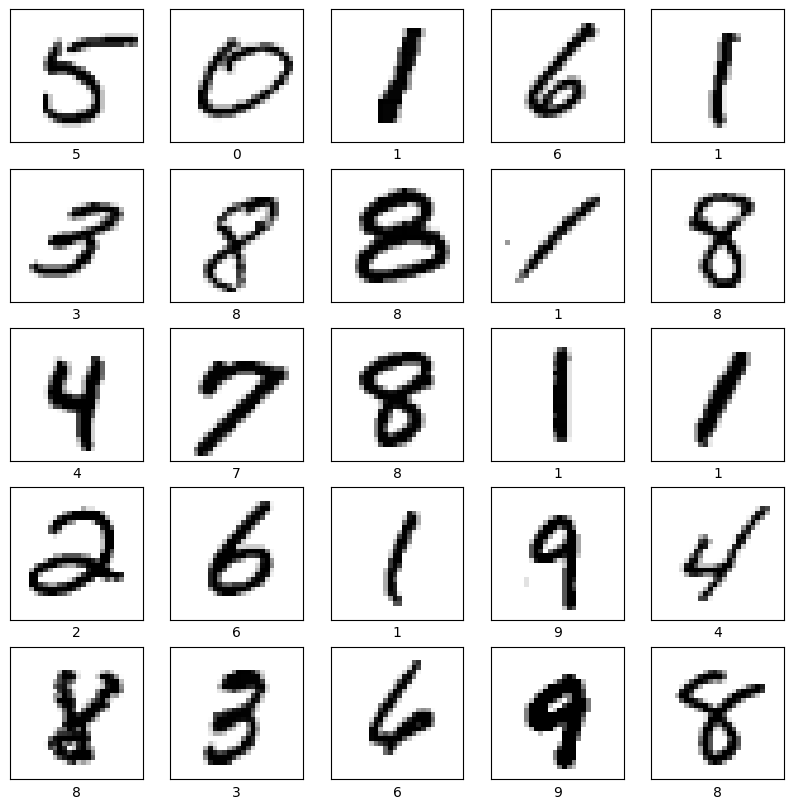

In [34]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [37]:
def confmat(actual, predicted):

    classes = np.unique(actual) # unique labels


    Matrix = np.zeros((len(classes), len(classes)), dtype=int) 

    for i in range(len(classes)):
        for j in range(len(classes)):
          
          # count the number of times actual class i was predicted as class j

           Matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return Matrix

[[ 943    0    6    1    0    6    9    6    6    3]
 [   2 1100    3    2    4    1    5    4   14    0]
 [  15    7  917   27    7    5   10   10   26    8]
 [   3    2   14  912    1   23    4   11   24   16]
 [   2    6    3    0  879    4   17    7   16   48]
 [   6    4   11   26    5  789   10    3   28   10]
 [  11    1   15    2   12   14  887    2   13    1]
 [   1   12   19    7    9    3    1  923    8   45]
 [   7   12   30   42   14   30    9    8  806   16]
 [   5    7    5    5   36    5    3   38   17  888]]


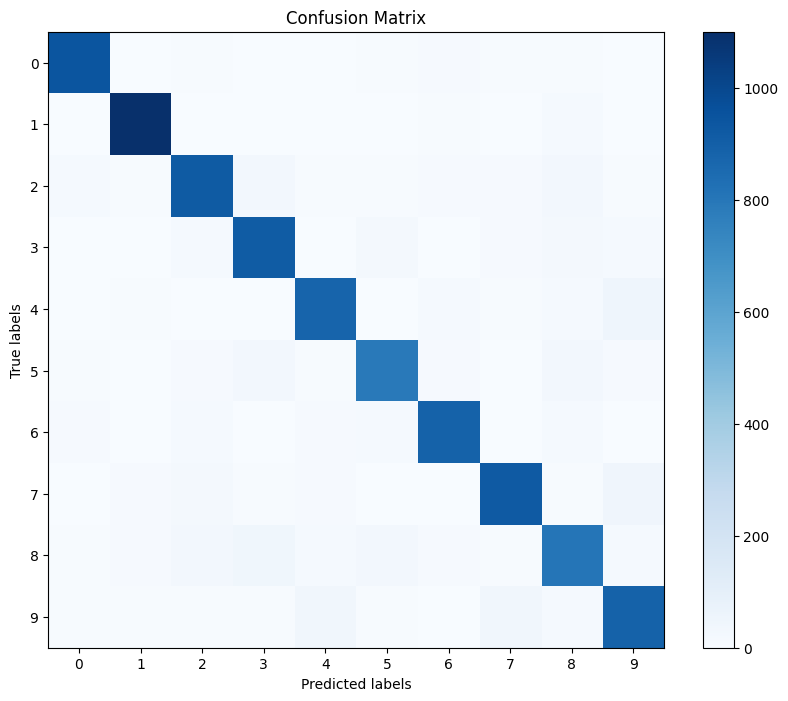

In [38]:
# Plot confusion matrix
conf_matrix = confmat(y_test, NN.predict(X_test))
print(conf_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.title('Confusion Matrix')
plt.show()